<a href="https://colab.research.google.com/github/ian-byrne/MADSmilestone2/blob/main/ImagePlayground/Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Clone the entire repo.
!git clone -l -s https://github.com/ian-byrne/MADSmilestone2.git

# Change directory into cloned repo
%cd MADSmilestone2

# List repo contents
!ls

Cloning into 'MADSmilestone2'...
remote: Enumerating objects: 610, done.
remote: Counting objects: 100% (610/610), done.
remote: Compressing objects: 100% (504/504), done.
remote: Total 610 (delta 333), reused 230 (delta 97), pack-reused 0
Receiving objects: 100% (610/610), 4.76 MiB | 7.12 MiB/s, done.
Resolving deltas: 100% (333/333), done.
/content/MADSmilestone2
Data			 Loading	       README.md
ian_testingground.ipynb  Model_Datasets.ipynb  Supervised
ImagePlayground		 multimodel1.ipynb     Supervised_CNN.ipynb
Labeling		 multimodel.ipynb


In [ ]:
#!rm -rf 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import io
import requests
from PIL import Image
import ImagePlayground.Images as Images # Contains functions: get_images_test(), get_coordinates(), viz_image()
import ast

In [7]:
# Read round, id, label dictionary file

path = '/content/MADSmilestone2/Data/Dictionaries/dementia_label_dicts/customLabelDict.txt'
cust_file = open(path, "r")
#print(cust_file.readline())
contents = cust_file.read()
dictionary = ast.literal_eval(contents)
cust_file.close()

In [26]:
def get_images_test():
    counter = 0
    store_images = []
    image_data = []

    for id, array in dictionary.items():
        for value in array:
            if counter < 1:
                url = 'https://clockimages.s3.us-west-1.amazonaws.com/NHATS_R' + str(
                    id) + '_ClockDrawings/' + value[0] + '.tif'

                response = requests.get(url)  # , stream = True)
                f = io.BytesIO(response.content)
                im_pil = Image.open(f)
                resize = im_pil.resize((512, 662)) 
                imarray1 = np.array(resize)
                # imarray = np.logical_not(np.array(im)).astype(int) #bool to int, inverts values
                # store_images.append(imarray1)
                image_data.append(get_coordinates(imarray1))  # , imarray1.shape[0], imarray1.shape[1]))
                viz_image(imarray1, im_pil)
                counter += 1

    return image_data


def get_coordinates(data):#, height, width):
  image = data
  image_array = []

  #for y in range(0, height):
    #for x in range(0, width):
      #if image[y][x] == False:
        #image_array.append((y, x))
  image_array = np.where(image == False) #np.argwhere( image == False)
  return image_array


def viz_image(image, image_pil):
  print("shape: ", image.shape)
  plt.figure(figsize=(9,11))
  # revert
  im2 = Image.fromarray(np.array(image))
  plt.imshow(im2)
  plt.show()



shape:  (662, 512)


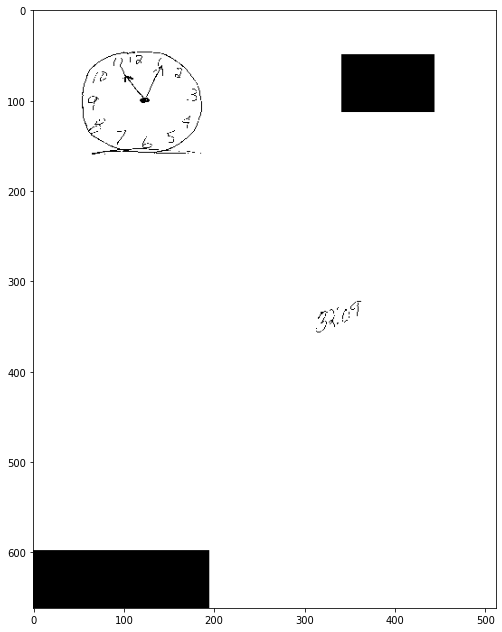

[(array([ 46,  46,  46, ..., 661, 661, 661]),
  array([100, 109, 110, ..., 192, 193, 194]))]

In [27]:
get_images_test()